# Introduction

In this modern world, a lot of data is collected on daily basis. For in-depth understanding, this data is analysed and visualised. During the shooting of movies also, there is a huge amount of data that is collected. One such data is of the Film Permits. This report summarises the numerical and visual analysis of data that gives the information regarding the film permits used for the shooting of different films in various loacations of New York City. For this purpose, packages like numpy, pandas, seaboorn and matplotlib are used. In this report, statistical analysis and visualation of various components like Duartion of filming, Event Type, Lead Time and Category is done. The statistical analysis gives us values like count, mean,standard deviation etcetra for Duration of Filming. In the similar way, different values are obtained for event type like unique, top, frequency etcetra. For Lead time and Category, the values will be different.


On the other hand, visualisations gives a clear picture of how this data is distributed. They increase the readability of the report. For each component, a visualisation of data is created. This visual representation of information gives understanding of the time taken to shoot a film, the places most considered for shooting of the films, the type of events for shooting,the countries most popular for shooting films, the most and the least used locations for filming etcetra. For the purpose of visualisatons, various figures are created like histogram, barplot, scatterplot using data visualisation librabries like seaborn and matplotlib. 


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
cwd = os.getcwd()

In [6]:
Fpr = pd.read_csv(os.path.join(cwd, 'film-permits.csv'))

Fpr means Film Permits

In [7]:
Fpr['StartDateTime'] = pd.to_datetime(var.StartDateTime)

In [8]:
Fpr['EndDateTime'] = pd.to_datetime(var.EndDateTime)

In [10]:
Fpr['DoF'] = (Fpr['EndDateTime'] - Fpr['StartDateTime']).astype("timedelta64[h]")

DoF is the Duration of filming

In [11]:
Fpr.DoF.describe()

count    52350.000000
mean        19.576409
std         43.021020
min          0.000000
25%         13.000000
50%         15.000000
75%         16.000000
max       3528.000000
Name: DoF, dtype: float64

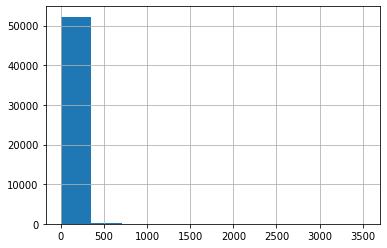

In [12]:
Fpr.DoF.hist()
plt.show()

The count for duration of filming exceeds 50,000. Most of shooting of films have taken 13 to 16 hours.The average time for filming is 15 hours. The maximum number of hours used for filming are 3528. 

In [13]:
Fpr.groupby(['Borough']).DoF.describe()

,count,mean,std,min,25%,50%,75%,max
Borough,,,,,,,,
Bronx,1473.0,16.030550,16.198909,2.0,14.0,15.0,16.0,270.0
Brooklyn,15887.0,16.142947,18.178803,0.0,14.0,14.0,16.0,929.0
Manhattan,26226.0,23.104362,58.246605,0.0,12.0,15.0,17.0,3528.0
Queens,8104.0,15.888203,13.947296,1.0,14.0,15.0,16.0,692.0
Staten Island,660.0,15.236364,8.536908,2.0,14.0,15.0,16.0,197.0


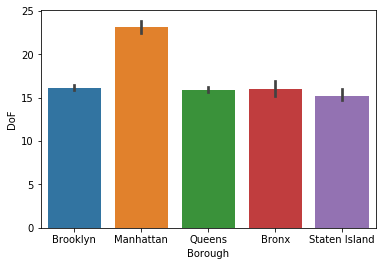

In [14]:
sns.barplot(x = 'Borough', y = 'DoF', data= Fpr)

Maximum Duration of Filming is in Manhattan and minimum in Staten Island. The time taken for filming is between 14-16 hours for all cities except Manhattan, for which it is 12-17 hours. 

In [15]:
Fpr.groupby(['Category']).DoF.describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Commercial,4391.0,14.970394,8.840373,1.0,13.0,15.0,16.0,252.0
Documentary,211.0,15.421801,15.809500,1.0,10.0,12.0,15.0,167.0
Film,9072.0,15.267306,12.232862,1.0,13.0,14.0,16.0,692.0
Music Video,166.0,15.271084,9.386257,1.0,12.0,14.0,16.0,74.0
Red Carpet/Premiere,1.0,17.000000,NaN,17.0,17.0,17.0,17.0,17.0
Still Photography,3294.0,13.928658,8.811145,0.0,12.0,13.0,15.0,205.0
Student,341.0,10.721408,11.002745,2.0,5.0,9.0,13.0,96.0
Television,28136.0,17.410755,34.560539,0.0,14.0,15.0,16.0,2488.0
Theater,4925.0,50.077157,106.396753,1.0,23.0,29.0,47.0,3528.0


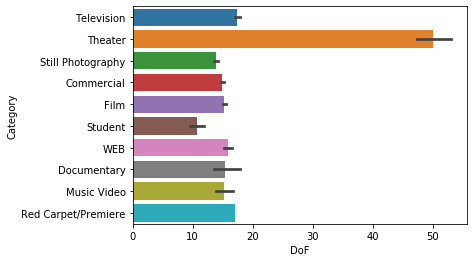

In [42]:
sns.barplot(x = 'DoF', y = 'Category',data= Fpr)

The  mean value for duration of filming is maximum for Theatre Category reaching 50.077157 hours and minimum for Student Category with just 10.721408 hours. The count for Television is highest and Red Carpet/Premiere is lowest.

In [17]:
Fpr.EventType.describe()

count               52350
unique                  4
top       Shooting Permit
freq                45905
Name: EventType, dtype: object

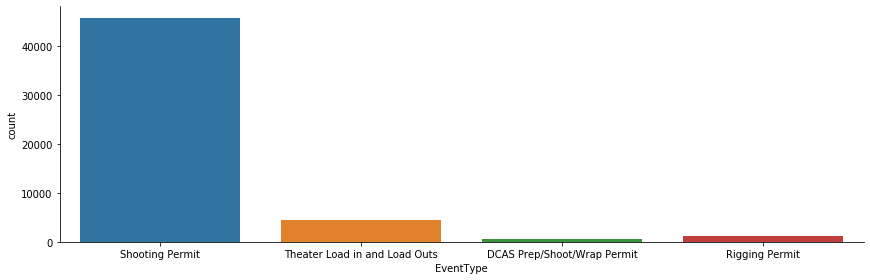

In [18]:
sns.catplot( x = 'EventType', kind = 'count', data = Fpr, height = 4, aspect = 3)

In Event type, the Shooting permit is highly taken and the DCAS Prep/Shoot/Wrap permit is the least taken.  

In [19]:
Fpr.groupby(['Borough']).EventType.describe()

,count,unique,top,freq
Borough,,,,
Bronx,1473,4,Shooting Permit,1303
Brooklyn,15887,4,Shooting Permit,14742
Manhattan,26226,4,Shooting Permit,21327
Queens,8104,4,Shooting Permit,7886
Staten Island,660,4,Shooting Permit,647


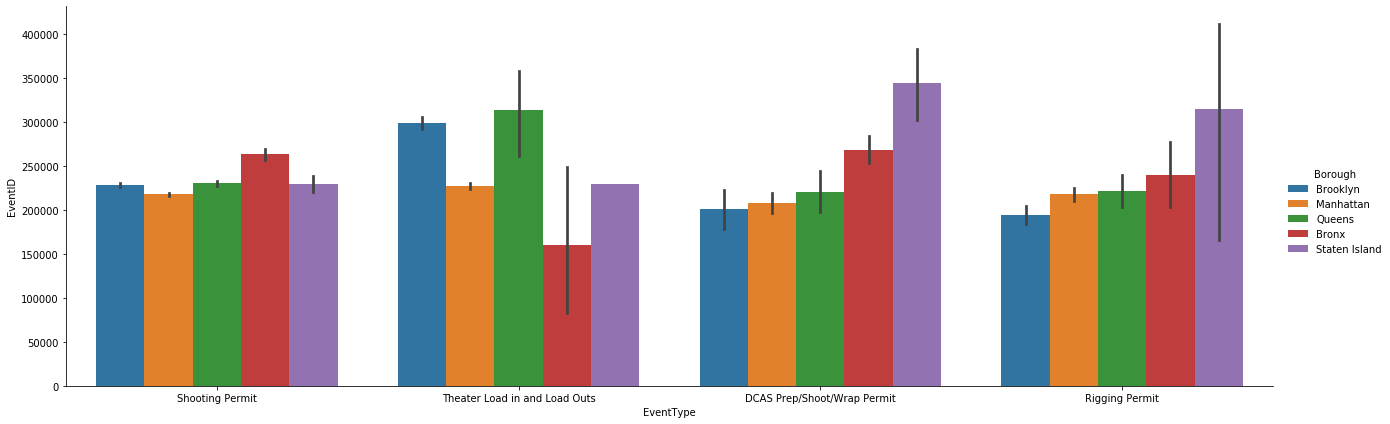

In [20]:
sns.catplot( x = 'EventType', y = 'EventID', hue ='Borough', kind = 'bar', data = Fpr, height = 6, aspect = 3)

Bronx is most popular for Shooting Permit whereas Queens is most popular for Theater Load in and Load outs. Staten Island is famous for not only DCAS Prep/Shoot/Wrap Permit but also Rigging Permit.

In [22]:
 Fpr['EnteredOn'] = pd.to_datetime( Fpr.EnteredOn)

In [23]:
 Fpr['Ltime'] = ( Fpr['StartDateTime'] -  Fpr['EnteredOn']).astype("timedelta64[h]")

Ltime is the Lead Time

In [47]:
Fpr.Ltime.describe()

count    52350.000000
mean       129.196218
std        177.720740
min        -28.000000
25%         49.000000
50%         90.000000
75%        136.000000
max       5754.000000
Name: Ltime, dtype: float64

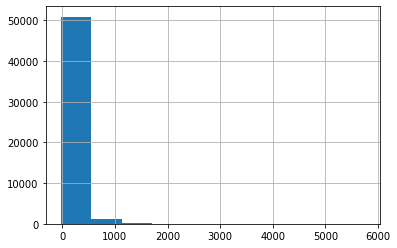

In [48]:
Fpr.Ltime.hist()
plt.show()

Most of lead time is between 49-136 hours. The average lead time is 90 hours

In [49]:
Fpr.corr()

,EventID,DoF,Ltime
EventID,1.000000,-0.024647,0.039107
DoF,-0.024647,1.000000,0.142604
Ltime,0.039107,0.142604,1.000000


There is a very little or no correlation between lead time and duration of filming. 

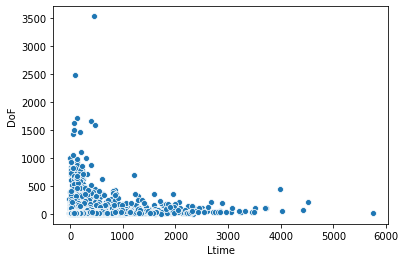

In [27]:
sns.scatterplot( x = 'Ltime', y = 'DoF', data =  Fpr)

The graph between lead time and duration of filming is non-linear

In [28]:
 Fpr.groupby(['Borough']).Ltime.describe()

,count,mean,std,min,25%,50%,75%,max
Borough,,,,,,,,
Bronx,1473.0,96.029192,67.923489,3.0,46.0,88.0,122.0,611.0
Brooklyn,15887.0,109.576257,102.155796,-28.0,50.0,89.0,134.0,1407.0
Manhattan,26226.0,154.706284,229.984424,-18.0,55.0,93.0,155.0,5754.0
Queens,8104.0,94.651777,82.473044,-9.0,44.0,85.0,116.0,1531.0
Staten Island,660.0,85.981818,66.511808,-8.0,44.0,70.0,112.0,759.0


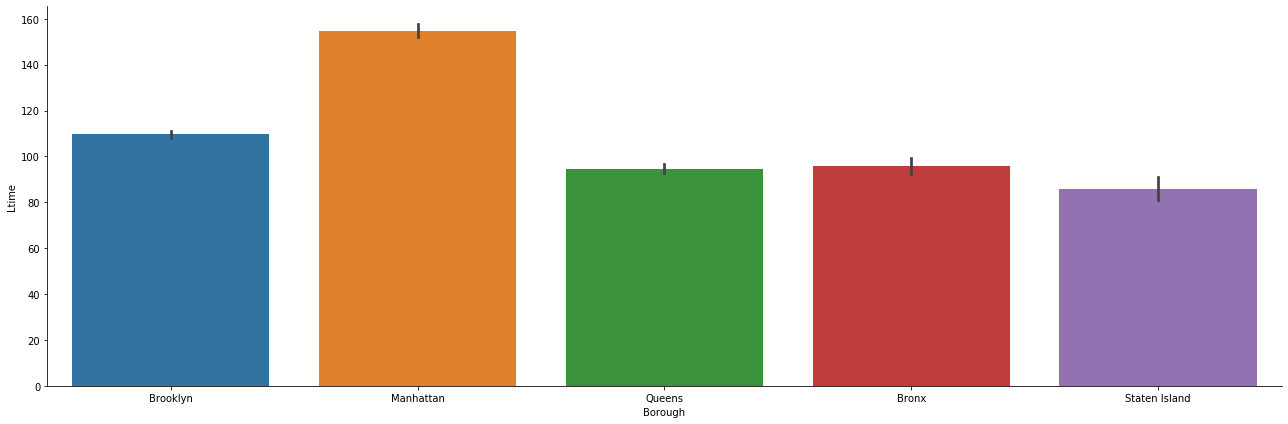

In [29]:
sns.catplot( x = 'Borough', y = 'Ltime', kind = 'bar', data =  Fpr, height = 6, aspect = 3)

Manhattan has longest lead time while Bronx has the shortest. Also, the count of Manhattan is maximum and that of Staten Island is minimum. 

In [30]:
 Fpr.Category.describe()

count          52350
unique            10
top       Television
freq           28136
Name: Category, dtype: object

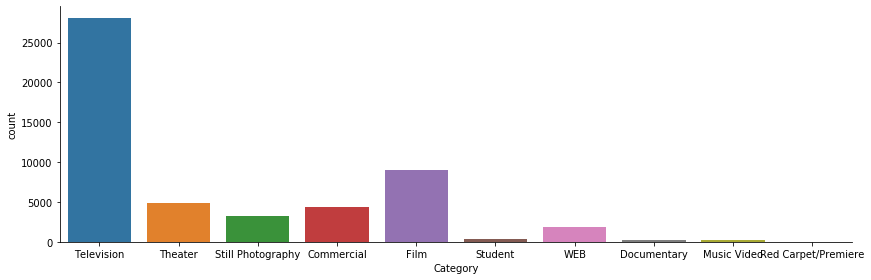

In [31]:
sns.catplot( x = 'Category', kind = 'count', data =  Fpr, height = 4, aspect = 3)

It is seen that the film permits for Television are the highest followed by film permits for shooting a Film and the lowest being permit for Carpet/Premiere.

In [32]:
 Fpr.groupby(['Country']).Category.describe()

,count,unique,top,freq
Country,,,,
Australia,5,2,Television,4
Canada,9,3,Television,4
France,7,2,Student,6
Germany,1,1,Television,1
Ireland,2,1,Film,2
Japan,8,1,Television,8
Netherlands,3,1,Film,3
Panama,7,1,Film,7
United Kingdom,16,4,Commercial,9


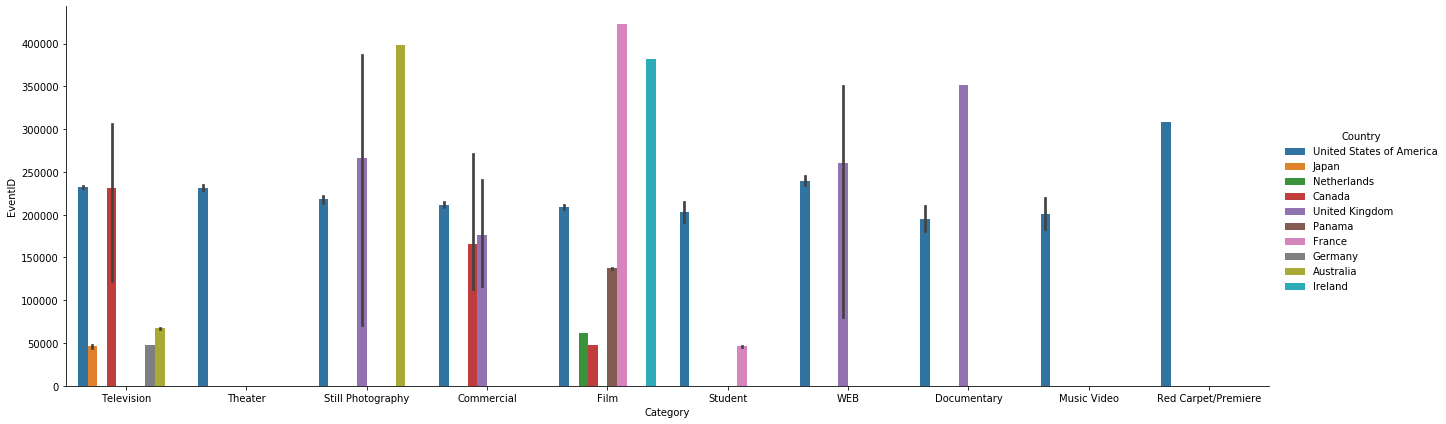

In [34]:
sns.catplot(x = 'Category', y = 'EventID', hue = 'Country', kind = 'bar', data =  Fpr, height = 6, aspect = 3)

From the visualisation it can be noted that United States plays a role in all the categories from television, Theater, Commercial, Film, Documentary to Red Carpet/Premiere but contributes majorly in Red carpet/Premiere. Japan can only be seen in  Television category. Similarly, Netherlands is just seen in Film category and no other category. Canada is highly keen in Television and commercial category and is also seen in Film category. It is noted that United Kingdom has major interest in Documentary and is also interested in WEB, Still Photography and Commercial categories. Panama can be seen only in Film category. France has major role in Film category which is higher than all the other countries. Other than that, France is keen in Student category. Germany has some interest in Telivision category only and not contributing much in other categories. Australia can be seen in Television category and has a high regard for Still Photography. Ireland is just noted in Film Category but holds a high value for it.

### Conclusion

To conclude, this report gives detailed information about the film permits taken for shooting in differnt locations of New York City. It also highlights the boroughs that are more popular for filming and those that are less popular. Along with this, it shows the various types of events and locations popular for those events. Moreover, data is given regarding the duration of filming throughout the New York city and then further grouped by Borough and Category.